## COVID-19: Simulación

### Caso sin resticciones

##### Modelo a simular [Kermack–McKendrick theory + extensión]

\begin{align}
\dot{S} & = -\beta SI\\ 
\dot{E} & = \beta SI - \alpha E \\
\dot{I} & = \alpha E - \gamma I\\
\dot{R} & = -\gamma I\\
\ N & = S + E + I + R\\
\ R_0 & = \frac{\beta}{\gamma}
\end{align}

##### Conceptos:
- S, número de personas susceptible, sin enfermedad
- E, número de expuestos
- I, número de infectados
- R, número de recuperados
- $\alpha$. inverso del período de incubación (1 / tiempo_incubacion)
- $\beta$, promedio de ratio de contacto en la población
- $\gamma$, inverso del período promedio de infección (periodo latente = 1 / $\gamma$ )
- $R_{0}$, rapidez con que la enfermedad se propaga

##### Datos de estudios médicos:
- Tiempo de incubación: 5-8 días (cogemos 6.5 días), por lo tanto $\alpha = \frac{1}{6.5}= 0.1538$ 
- Periodo latente: 2 días, por lo tanto $\gamma =  \frac{1}{2} = 0.5$
- $R_0$ = 1.5, 2.5, 3.5 (cogemos 3.5), por lo tanto $\beta = R_0 * \gamma = 3.5 * 0.5= 1.75$ 

##### Datos de inicio:

- Asumimos un grupo de población de 10000 personas, una persona expuesta a la enfermedad y cero infectados

In [140]:
N = 10000
startS, startE, startI, r0 = 1 - 1/N, 1/N, 0, 0
alpha, beta, gamma = 0.1538, 1.75, 0.5
t = 200 #100 días

In [141]:
import numpy as np
def modelo(startS, startE, startI, r0, alpha, beta, gamma, t):
    startS, startE, startI, r0 = init_vals
    S, E, I, R = [startS], [startE], [startI], [r0]
    for dias in range(t):
        next_S = S[-1] - (beta*S[-1]*I[-1])
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])
        next_R = R[-1] + (gamma*I[-1])
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

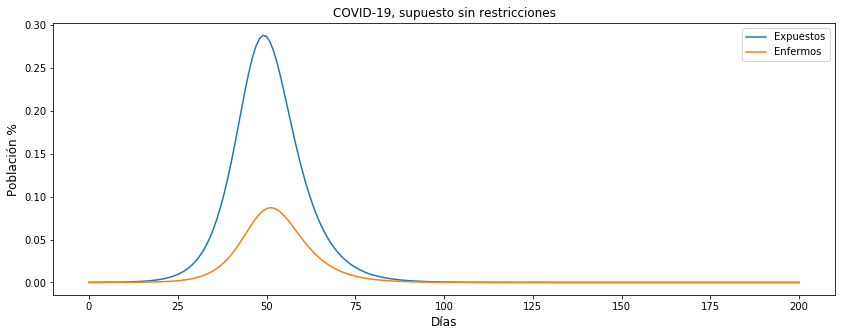

El auge para expuesto se encuentra en el día: 49
El auge para enfermos se encuentra en el día: 51


In [173]:
import matplotlib.pyplot as plt
from pylab import rcParams

results = modelo(startS, startE, startI, r0, alpha, beta, gamma, t)
expuestos = results[:,1]
enfermos = results[:,2]
rcParams['figure.figsize'] = 14, 5
plt.plot(results[:,1:3])
plt.legend(labels=['Expuestos','Enfermos'],loc="upper right")
plt.title('COVID-19, supuesto sin restricciones')
plt.xlabel('Días', fontsize=12)
plt.ylabel('Población %', fontsize=12)
plt.show()
print('El auge para expuesto se encuentra en el día: {}'.format(expuestos.argmax(axis=0)))
print('El auge para enfermos se encuentra en el día: {}'.format(enfermos.argmax(axis=0)))

### Caso con resticciones - confinamiento en casa -

##### Modelo a simular [Kermack–McKendrick theory + extensión + restricciones]

\begin{align}
\dot{S} & = -\beta SIp\\ 
\dot{E} & = \beta SIp - \alpha E \\
\dot{I} & = \alpha E - \gamma I\\
\dot{R} & = -\gamma I\\
\ N & = S + E + I + R\\
\ R_0 & = \frac{\beta}{\gamma}
\end{align}

##### Conceptos:
- S, número de sospechosos
- E, número de expuestos
- I, número de infectados
- R, número de recuperados
- $\alpha$. inverso del período de incubación (1 / tiempo_incubacion)
- $\beta$, promedio de ratio de contacto en la población
- $\gamma$, inverso del período promedio de infección (periodo latente = 1 / $\gamma$ )
- $R_{0}$, rapidez con que la enfermedad se propaga
- $p$, parámetro de restricción -confinamiento en casa-, su valor está [0,1] donde 0 significa salir a la calle está totalmente prohibido y 1 significa el mismo caso sin restricciones

##### Datos de estudios médicos:
- Tiempo de incubación: 5-8 días (cogemos 6.5 días), por lo tanto $\alpha = \frac{1}{6.5}= 0.1538$ 
- Periodo latente: 2 días, por lo tanto $\gamma =  \frac{1}{2} = 0.5$
- $R_0$ = 1.5, 2.5, 3.5 (cogemos 3.5), por lo tanto $\beta = R_0 * \gamma = 3.5 * 0.5= 1.75$ 

##### Datos de inicio:

- Asumimos un grupo de población de 10000 personas, una persona expuesta a la enfermedad y cero infectados

In [136]:
N = 10000
startS, startE, startI, r0 = 1 - 1/N, 1/N, 0, 0
alpha, beta, gamma = 0.1538, 1.75, 0.5
t = 200 #100 días

In [137]:
#función actualizada
import numpy as np
def modelo_r(startS, startE, startI, r0, alpha, beta, gamma, t, p):
    startS, startE, startI, r0 = init_vals
    S, E, I, R = [startS], [startE], [startI], [r0]
    for dias in range(t):
        next_S = S[-1] - (p*beta*S[-1]*I[-1])
        next_E = E[-1] + (p*beta*S[-1]*I[-1] - alpha*E[-1])
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])
        next_R = R[-1] + (gamma*I[-1])
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

Probamos diferentes supuesto:
- 99% de la población puede salir a la calle: prácticamente no hay restricción
- 75% de la población puede salir a la calle: cierta parte de la población sale de sus casa (por ejemplo estudiantes y la gente de oficina)
- 50% de la población puede salir a la calle: la mitad de la población continuamente permanece en sus casas (diría que es la situación actual en España)
- 25% de la población puede salir a la calle: únicamente salen personas autorizadas a ello (policía, ejército, médicos etc.)

In [148]:
p = 0.25
results_025 = modelo_r(startS, startE, startI, r0, alpha, beta, gamma, t,p)
expuestos_025 = results_025[:,1]
enfermos_025 = results_025[:,2]

p = 0.5
results_05 = modelo_r(startS, startE, startI, r0, alpha, beta, gamma, t,p)
expuestos_05 = results_05[:,1]
enfermos_05 = results_05[:,2]

p = 0.75
results_075 = modelo_r(startS, startE, startI, r0, alpha, beta, gamma, t,p)
expuestos_075 = results_075[:,1]
enfermos_075 = results_075[:,2]

p = 0.99
results_099 = modelo_r(startS, startE, startI, r0, alpha, beta, gamma, t,p)
expuestos_099 = results_099[:,1]
enfermos_099 = results_099[:,2]


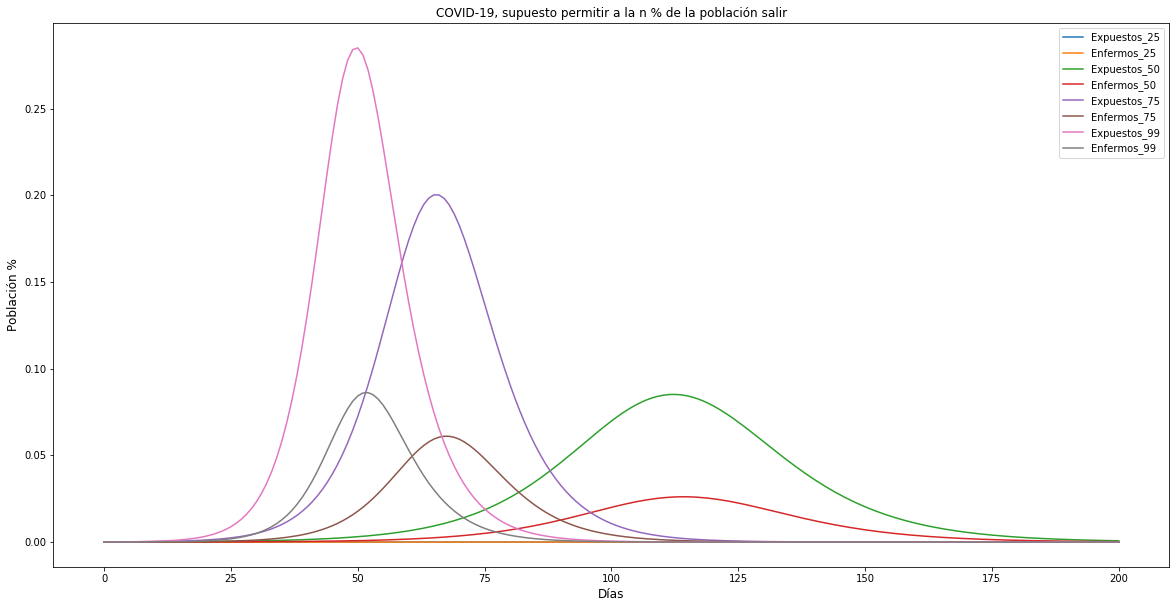

In [156]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

plt.plot(results_025[:,1:3])
plt.plot(results_05[:,1:3])
plt.plot(results_075[:,1:3])
plt.plot(results_099[:,1:3])

plt.legend(labels=['Expuestos_25','Enfermos_25', 'Expuestos_50','Enfermos_50', 'Expuestos_75','Enfermos_75', 'Expuestos_99','Enfermos_99'],loc="upper right")
plt.title('COVID-19, supuesto permitir a la n % de la población salir')
plt.xlabel('Días', fontsize=12)
plt.ylabel('Población %', fontsize=12)
plt.show()

print('Permitiendo a 25% de la población: el auge para expuestos se encuentra en el día: {}'.format(expuestos_025.argmax(axis=0)))
print('Permitiendo a 25% de la población: el auge para enfermos se encuentra en el día: {}'.format(enfermos_025.argmax(axis=0)))
print('Permitiendo a 25% de la población: el auge de la parte población muerta es: {}%'.format(round(max(enfermos_025*100),4)))
print('Permitiendo a 50% de la población: el auge para expuestos se encuentra en el día: {}'.format(expuestos_05.argmax(axis=0)))
print('Permitiendo a 50% de la población: el auge para enfermos se encuentra en el día: {}'.format(enfermos_05.argmax(axis=0)))
print('Permitiendo a 50% de la población: el auge de la parte población muerta es: {}%'.format(round(max(enfermos_05*100),4)))
print('Permitiendo a 75% de la población: el auge para expuestos se encuentra en el día: {}'.format(expuestos_075.argmax(axis=0)))
print('Permitiendo a 75% de la población: el auge para enfermos se encuentra en el día: {}'.format(enfermos_075.argmax(axis=0)))
print('Permitiendo a 75% de la población: el auge de la parte población muerta es: {}%'.format(round(max(enfermos_075*100),4)))
print('Permitiendo a 99% de la población: el auge para expuestos se encuentra en el día: {}'.format(expuestos_099.argmax(axis=0)))
print('Permitiendo a 99% de la población: el auge para enfermos se encuentra en el día: {}'.format(enfermos_099.argmax(axis=0)))
print('Permitiendo a 99% de la población: el auge de la parte población muerta es: {}%'.format(round(max(enfermos_099*100),4)))

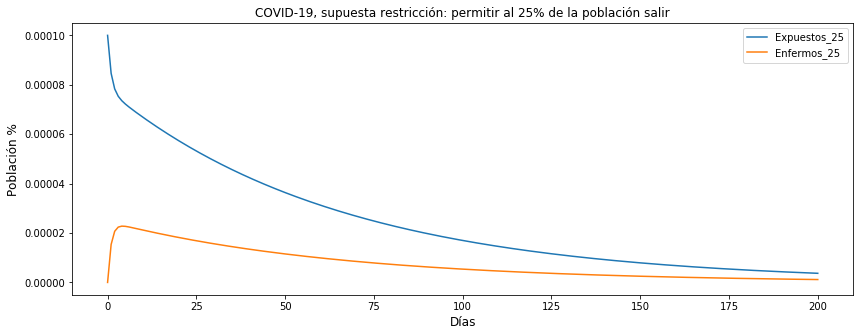

Permitiendo a 25% de la población: el auge para expuestos se encuentra en el día: 0
Permitiendo a 25% de la población: el auge para enfermos se encuentra en el día: 4
Permitiendo a 25% de la población: el auge de la parte población muerta es: 0.0023%


In [172]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5
plt.plot(results_025[:,1:3])
plt.legend(labels=['Expuestos_25','Enfermos_25'],loc="upper right")
plt.title('COVID-19, supuesta restricción: permitir al 25% de la población salir')
plt.xlabel('Días', fontsize=12)
plt.ylabel('Población %', fontsize=12)
plt.show()
print('Permitiendo a 25% de la población: el auge para expuestos se encuentra en el día: {}'.format(expuestos_025.argmax(axis=0)))
print('Permitiendo a 25% de la población: el auge para enfermos se encuentra en el día: {}'.format(enfermos_025.argmax(axis=0)))
print('Permitiendo a 25% de la población: el auge de la parte población muerta es: {}%'.format(round(max(enfermos_025*100),4)))

#### Bibliografía:

- https://mathworld.wolfram.com/Kermack-McKendrickModel.html
- https://www.thelancet.com/journals/langlo/article/PIIS2214-109X(20)30074-7/fulltext
- https://arxiv.org/pdf/2002.06563.pdf